## Face Recognition System
### Analysis on its performance

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pandas as pd


### Loading and Storing the dataset

In [4]:
## Use the dataset attached with the repo , or feel free to use other datasets too

# No of Individuals
numOfPeople=100

## Declare
# s_probe & s_gallery: List of Image File names
s_probe=[]
s_gallery=[]

## This Block is to read the dataset i provided , if you are byod(bring your own dataset)
## make sure to change the below to suit ur needs

for i in range(numOfPeople):        
        s_probe.append('subject'+str(i+1)+'_img'+str(2)+'.pgm')
        s_probe.append('subject'+str(i+1)+'_img'+str(3)+'.pgm')
        s_gallery.append('subject'+str(i+1)+'_img'+str(1)+'.pgm')

##Declare
sim_matrix=np.zeros((len(s_probe),len(s_gallery)))
probe_size=len(s_probe)
gallery_size=len(s_gallery)

In [5]:
for k in range(len(s_probe)):
    for l in range(len(s_gallery)):
        
        probe_im=mpimg.imread('./ProbeSet/'+s_probe[k])
        gallery_im=mpimg.imread('./GallerySet/'+s_gallery[l])
        
        
        mu_probe=np.mean(probe_im)
        mu_gallery=np.mean(gallery_im)
        
        std_probe=np.std(probe_im)
        std_gallery=np.std(gallery_im)
        
        result=0
        for i in range(probe_im.shape[0]):
            for j in range(probe_im.shape[1]):
                result=((int(probe_im[i,j])-mu_probe)*(int(gallery_im[i,j])-mu_gallery)/(std_probe*std_gallery))+result

        sim_matrix[k,l]=result/gallery_im.size
        

### Example Face image
#### An Enrolled Image vs Presented Image

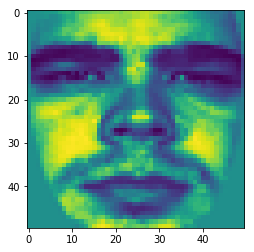

In [9]:
## Enrolled Image
plt.imshow(gallery_im)

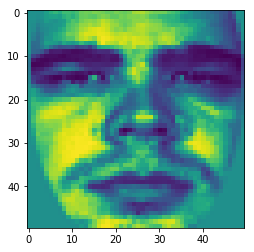

In [10]:
## Presented at sensor
plt.imshow(probe_im)

## Score Classification

In [18]:
### Creating Distribution Graphs for Genuine scores and Imposter scores
## Define
genuine_score=np.zeros(probe_size)
imposter_score=np.zeros(probe_size*gallery_size-probe_size)
k=l=0
            
# Code For calculating Genuine and Imposter Scores
for i in range(probe_size):                        
    for j in range(gallery_size):
        if (np.floor(i/2)==j):
            genuine_score[k]=sim_matrix[i,j]
            k=k+1
        else:
            imposter_score[l]=sim_matrix[i,j]
            l=l+1

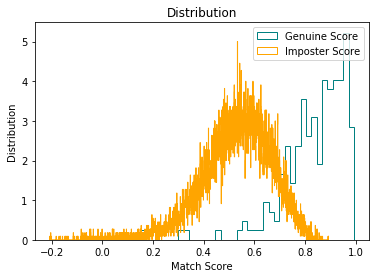

In [19]:
## Plotting the Distribution Curves
plt.hist(genuine_score,density=True,stacked=True,bins=round(genuine_score.size/5),histtype='step',color='teal',label='Genuine Score')
plt.hist(imposter_score,density=True,stacked=True,bins=round(imposter_score.size/10),histtype='step',color='orange',label='Imposter Score')
plt.title('Distribution')
plt.xlabel('Match Score')
plt.ylabel('Distribution')
plt.legend()

In [20]:
## The D Prime Value gives a measurement of the separation of the two distributions

dprime=(2**0.5)*abs(np.mean(genuine_score)-np.mean(imposter_score))/(( np.var(genuine_score)+np.var(imposter_score))**0.5)

# Print Statement for display (Escape Sequences used \n \')
print('d\' for the distributions of the Face system: '+str(dprime)) 

d' for the distributions of the Face system: 2.3365486088062197


### Plotting CMC curve and True Positive Id Rate

In [21]:
### Code to Calculate TPIR/CMC

def calc_tpir(simMat,t):
    '''
    Function name : calc_tpir
    Description : calculates the True Positive Identification Rate
    
    Input Arguments: 1) a Similarity matrix 'simMat'
                     2) a rank value 't'
    
    Return value : a TPIR decimal value 'tpir'
    '''
    rows=simMat.shape[0]
    cols=simMat.shape[1]
    count=0
    Match=False
    maxIndex=np.zeros(cols)

    for i in range(rows):
        
        # Checking if the top scores from each column contains the genuine score
        maxIndex[:]=np.argsort(simMat[i,:])[::-1]  # reverse indexing of the sorted array
        for j in range(t):
            ## ###########CHange to be made here
            if np.floor(i/2) in maxIndex[:t]:
                count=count+1
                break
                #print('Match '+str(count)) # Debug Statement
    
    tpir=(count/rows)
    fnir=1-tpir #Return this value if needed , for future reference 
    return tpir


# Array to collect the values of CMC to be plotted
CMC=np.zeros(gallery_size)

for i in range(gallery_size):
    CMC[i]=calc_tpir(sim_matrix,i+1)
    

Text(0.5,1,'CMC curve for Full Face Image')

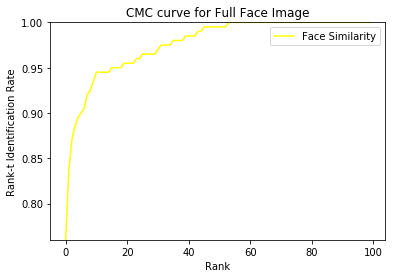

In [22]:
plt.plot(np.arange(gallery_size),CMC,color='yellow',label='Face Similarity')
plt.ylim(np.min(CMC),1)
plt.xlabel('Rank')
plt.ylabel('Rank-t Identification Rate')
plt.legend()
plt.title('CMC curve for Full Face Image')

## Calculating False Accept Rate and False Reject Rate

In [23]:
### FAR and FRR

## Calculating Reciever Operating Characteristic curve


## Declaring variables
s_min=np.min(sim_matrix)
s_max=np.max(sim_matrix)
T=gallery_size
p=(s_max-s_min)/(T-1)
FAR=0
FRR=0

FAR=np.zeros(gallery_size)
FRR=np.zeros(gallery_size)
thres=np.zeros(gallery_size)


## Implementation

for j in range(gallery_size):
    
    # Calculating the threshold for every j
    # Closely follows the steps in the book 
    n= s_min +((j+1)-1)*p
    thres[j]= n
    
    
    # FAR for Full Face
    for i in range(imposter_score.size):
        if imposter_score[i]>= n:
            FAR[j]=FAR[j]+1
    FAR[j]=FAR[j]/imposter_score.size
    
    # FRR for Full Face
    for i in range(genuine_score.size):
        if genuine_score[i]< n:
            FRR[j]=FRR[j]+1
    FRR[j]=FRR[j]/genuine_score.size
    
    

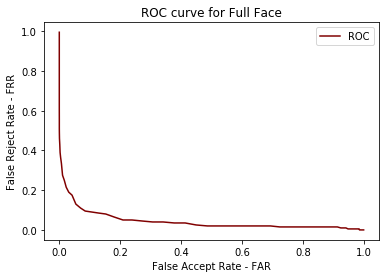

In [24]:
## Plotting a Reciever Operator Chracteristic curve using the FAR and FRR values

plt.plot(FAR,FRR,color='maroon',label='ROC')
plt.title('ROC curve for Full Face')
plt.xlabel('False Accept Rate - FAR')
plt.ylabel('False Reject Rate - FRR')
plt.legend()